In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset= torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
traindata=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=False, transform=transform)
testdata= torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes=('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=F. max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
net=Net()

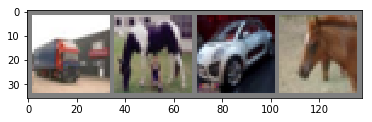

truck horse   car horse


In [7]:
def imshow(img):
    img=img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter=iter(traindata)
images,labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer= optim.SGD(net.parameters(),lr=0.001)

In [12]:
running_loss=0.0
for epoch in range(3):
    for i,data in enumerate(traindata,0):
        images,labels=data
        
        optimizer.zero_grad()
        outputs=net(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss
        if(i%2000==1999):
            print(' '.join('[%d,%5d]loss:%.3f'%(epoch+1,i+1,running_loss/2000)))
            running_loss=0.0

[ 1 ,   2 0 0 0 ] l o s s : 1 . 2 4 8
[ 1 ,   4 0 0 0 ] l o s s : 1 . 2 2 7
[ 1 ,   6 0 0 0 ] l o s s : 1 . 2 3 8
[ 1 ,   8 0 0 0 ] l o s s : 1 . 2 1 2
[ 1 , 1 0 0 0 0 ] l o s s : 1 . 1 8 1
[ 1 , 1 2 0 0 0 ] l o s s : 1 . 1 8 7
[ 2 ,   2 0 0 0 ] l o s s : 1 . 3 9 6
[ 2 ,   4 0 0 0 ] l o s s : 1 . 1 2 5
[ 2 ,   6 0 0 0 ] l o s s : 1 . 1 0 3
[ 2 ,   8 0 0 0 ] l o s s : 1 . 1 3 0
[ 2 , 1 0 0 0 0 ] l o s s : 1 . 1 2 4
[ 2 , 1 2 0 0 0 ] l o s s : 1 . 1 2 7
[ 3 ,   2 0 0 0 ] l o s s : 1 . 3 0 2
[ 3 ,   4 0 0 0 ] l o s s : 1 . 0 1 1
[ 3 ,   6 0 0 0 ] l o s s : 1 . 0 3 2
[ 3 ,   8 0 0 0 ] l o s s : 1 . 0 5 5
[ 3 , 1 0 0 0 0 ] l o s s : 1 . 0 6 9
[ 3 , 1 2 0 0 0 ] l o s s : 1 . 0 5 9


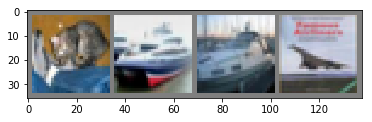

Ground Truth:    cat  ship  ship plane
  cat   car plane plane


In [15]:
dataiter2=iter(testdata)
images,labels=dataiter2.next()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ',' '.join('%5s'%classes[labels[j]] for j in range(4)))
outputs=net(images)
_,predicted=torch.max(outputs,1)

print(' '.join('%5s'%classes[predicted[j]] for j in range(4)))